# Convolutional Neural Network Architecture

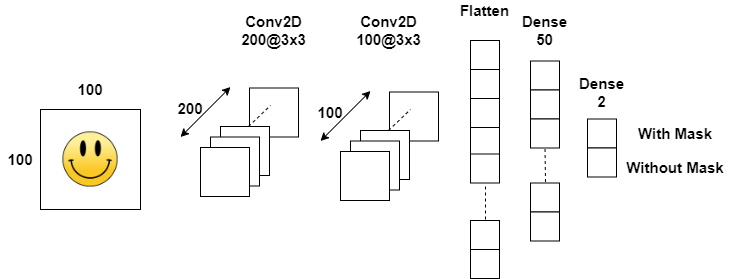

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [36]:
print(train_data.shape,'\n',test_data.shape)

(1238, 100, 100, 1) 
 (138, 100, 100, 1)


In [7]:

fit=model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 20s 216ms/step - loss: 0.7968 - accuracy: 0.4795 - val_loss: 0.6669 - val_accuracy: 0.6008
Epoch 2/20
31/31 [==============================] - 5s 146ms/step - loss: 0.6469 - accuracy: 0.6379 - val_loss: 0.5908 - val_accuracy: 0.6210
Epoch 3/20
31/31 [==============================] - 4s 143ms/step - loss: 0.5104 - accuracy: 0.7384 - val_loss: 0.4042 - val_accuracy: 0.8226
Epoch 4/20
31/31 [==============================] - 5s 146ms/step - loss: 0.3658 - accuracy: 0.8633 - val_loss: 0.2888 - val_accuracy: 0.8952
Epoch 5/20
31/31 [==============================] - 4s 142ms/step - loss: 0.2963 - accuracy: 0.8721 - val_loss: 0.2772 - val_accuracy: 0.8871
Epoch 6/20
31/31 [==============================] - 5s 146ms/step - loss: 0.1988 - accuracy: 0.9209 - val_loss: 0.2484 - val_accuracy: 0.9073
Epoch 7/20
31/31 [==============================] - 5s 147ms/step - loss: 0.1667 - accuracy: 0.9416 - val_loss: 0.3308 - val_accuracy: 0.8710
Epoch

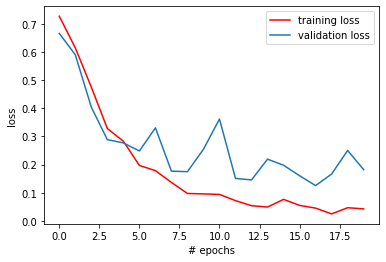

In [9]:
from matplotlib import pyplot as plt

plt.plot(fit.history['loss'],'r',label='training loss')
plt.plot(fit.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

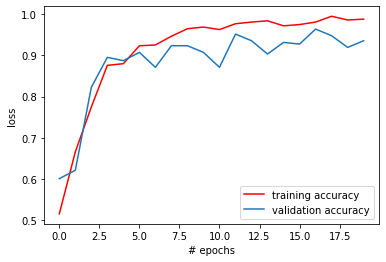

In [35]:
plt.plot(fit.history['accuracy'],'r',label='training accuracy')
plt.plot(fit.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 115ms/step - loss: 0.1422 - accuracy: 0.9565
[0.14223413169384003, 0.95652174949646]


In [28]:
test_data.shape

(138, 100, 100, 1)

In [22]:
pred=model.predict(test_data)

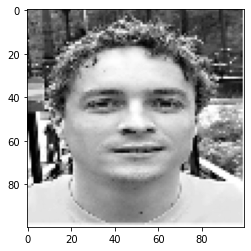

In [61]:
import matplotlib.pyplot as plt
img_no=7
plt.imshow(test_data[img_no],cmap='gray')

In [62]:
no_mask=round(pred[img_no][1],3)*100
mask=round(pred[img_no][0],3)*100
print(f"No Mask : {no_mask}\nMask : {mask}")

No Mask : 91.79999828338623
Mask : 0.10000000474974513
